In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pickle
import pandas as pd

## Load Important Function

In [2]:
class Data:
    def __init__(self, array_list):
        self.array_list = array_list

    def save(self, filename):
        with open(filename, 'wb') as f:
            pickle.dump(self.array_list, f)

    @classmethod
    def load(cls, filename):
        with open(filename, 'rb') as f:
            array_list = pickle.load(f)
        return cls(array_list)

In [7]:
def omega2cistrans(omega):
    """Converts a sequence of float omega angles (in degrees) to an array of ints: 0 cis and 1 trans."""
    
    shifted_omega = (omega + 90.0) % 360.0 - 90.0 # shift into (-90, 270) range to avoid periodic boundaries
    
    cistrans = np.where(shifted_omega > 90.0, 1, 0).astype(int)
    return cistrans

## Plot the trans population plot

### Load in the omega angle trajectories by result

In [3]:
# Parameters
residues_to_plot = [0, 1, 2]  # Residues to plot
num_residues = len(residues_to_plot)

omegas_by_result = []  # To store processed omega data
save_dir = 'omega_data'
all_omega = Data.load(f"{save_dir}/data.pkl").array_list  # This is an (742, x, 3) array


In [4]:
# Plot omega angles for the selected residues
for i, shifted_omega in enumerate(omegas_by_result):
    nsnaps, res = shifted_omega.shape  # Get number of snapshots and residues

    plt.figure(figsize=(10, 2))  # Create a figure for each replica
    start = 0

    # Plot each residue
    for panel, residue in enumerate(residues_to_plot, 1):
        plt.subplot(len(residues_to_plot), 1, panel)
        t = np.arange(start, nsnaps) * 0.010  # Time axis in ns
        plt.plot(t, shifted_omega[start:nsnaps, residue], '.', ms=1)
        plt.xlabel('time (ns)')
        plt.ylabel(f'$\\omega$ res {residue} (deg)')
        plt.title(f'Omega angles vs Time for residue {residue} (replica {i}) in 19AE1-4-A')

    plt.tight_layout()  # Adjust layout
    #plt.show()

In [5]:
print(len(all_omega)) 

all_omega[0].shape
all_omega[0]

742


array([[-173.65106  ,    8.187268 ,  158.7122   ],
       [ 149.942    ,   -5.472654 , -179.34113  ],
       [ 162.98587  ,    2.9294653, -170.57141  ],
       ...,
       [ -25.63846  ,    6.4290886, -142.46432  ],
       [  -1.3674331,   47.98817  , -169.6922   ],
       [ -16.094692 ,   27.522018 ,  177.88043  ]], dtype=float32)

### Convert the Omega into 1 trans and 0 cis


In [8]:
ntraj = len(all_omega)
all_cistrans = []
for i in range(ntraj):
    all_cistrans.append(omega2cistrans(all_omega[i]))

all_cistrans

# Find the longest traj
maxlength = max( [ len(all_cistrans[i]) for i in range(ntraj) ])
print('maxlength', maxlength)

# Make an array to store all the trajectories
traj = np.nan * np.ones( (ntraj, maxlength, 3) )

for i in range(ntraj):
    n = len(all_cistrans[i])
    traj[i, 0:n, :] = all_cistrans[i]


traj

maxlength 196095


array([[[ 1.,  0.,  1.],
        [ 1.,  0.,  1.],
        [ 1.,  0.,  1.],
        ...,
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]],

       [[ 0.,  0.,  1.],
        [ 0.,  0.,  1.],
        [ 0.,  0.,  1.],
        ...,
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]],

       [[ 0.,  0.,  1.],
        [ 0.,  0.,  1.],
        [ 0.,  0.,  1.],
        ...,
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]],

       ...,

       [[ 1.,  1.,  0.],
        [ 1.,  1.,  0.],
        [ 1.,  1.,  0.],
        ...,
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]],

       [[ 1.,  0.,  1.],
        [ 1.,  0.,  1.],
        [ 1.,  0.,  1.],
        ...,
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]],

       [[ 0.,  0.,  1.],
        [ 0.,  0.,  1.],
        [ 0.,  0.,  1.],
        ...,
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]]

### Plot Average Trans Population of entire 8 states simulation


In [9]:
# Compute the average over all trajectories for non-nan entries

n_included = np.sum(np.where(np.isnan(traj[:,:,:]), 0, 1), axis=0)
print('n_included', n_included, 'n_included.shape', n_included.shape)

p_trans = np.nanmean(traj, axis=0)
p_trans_std = ((np.nanvar(traj, axis=0)) / (n_included-1))**0.5

print('p_trans', p_trans )
print('p_trans_std', p_trans_std)

n_included [[742 742 742]
 [742 742 742]
 [742 742 742]
 ...
 [  1   1   1]
 [  1   1   1]
 [  1   1   1]] n_included.shape (196095, 3)
p_trans [[0.58760108 0.45822102 0.48113208]
 [0.58625337 0.45552561 0.47439353]
 [0.58625337 0.45552561 0.47439353]
 ...
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]]
p_trans_std [[0.01808385 0.01830372 0.01835488]
 [0.01809259 0.01829515 0.01834386]
 [0.01809259 0.01829515 0.01834386]
 ...
 [       nan        nan        nan]
 [       nan        nan        nan]
 [       nan        nan        nan]]


/var/folders/2g/yfyfpy7d3n3fwl_23ytkftvm0000gn/T/ipykernel_82289/774145360.py:7: RuntimeWarning: invalid value encountered in divide
  p_trans_std = ((np.nanvar(traj, axis=0)) / (n_included-1))**0.5


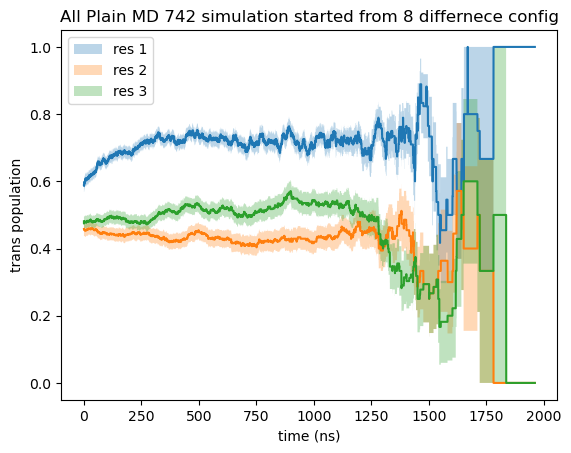

In [11]:
plt.figure()

ns_per_step = 0.01
time_in_ns = np.arange(maxlength)*ns_per_step

plt.plot(time_in_ns, p_trans) # all three residues
plt.fill_between(time_in_ns, (p_trans+p_trans_std)[:,0], (p_trans-p_trans_std)[:,0], alpha=0.3, lw=1, label='res 1') # all three residues
plt.fill_between(time_in_ns, (p_trans+p_trans_std)[:,1], (p_trans-p_trans_std)[:,1], alpha=0.3, lw=1, label='res 2') # all three residues
plt.fill_between(time_in_ns, (p_trans+p_trans_std)[:,2], (p_trans-p_trans_std)[:,2], alpha=0.3, lw=1, label='res 3') # all three residues

plt.xlabel('time (ns)')
plt.ylabel('trans population')
plt.title('All Plain MD 742 simulation started from 8 differnece config')

plt.legend(loc='best')

In [ ]:
df_stationary_p = pd.read_csv("autocoorel_data/trans_population_at_lagtime.csv")
df_stationary_p['state'] = 0  # or whatever state index it should be
print(df_stationary_p)
    
# Pivot the DataFrame to reshape it
pivot_mean = df_stationary_p.pivot(index='state', columns='res', values='mean')
pivot_std = df_stationary_p.pivot(index='state', columns='res', values='std')

# Convert to NumPy arrays
trans_refer_array = pivot_mean.to_numpy()  # shape (1, 3) state, residues 
trans_refer_err_array = pivot_std.to_numpy()  # shape (1, 3)
trans_refer_array.shape
trans_refer_array

   res  lagtime_index  lagtime_ns      mean       std  state
0    0             24       201.0  0.725067  0.028305      0
1    1             24       201.0  0.473500  0.107153      0
2    2             24       201.0  0.548286  0.084071      0


array([[0.72506716, 0.47349984, 0.54828621]])

In [15]:
trans_refer_array.shape

(1, 3)

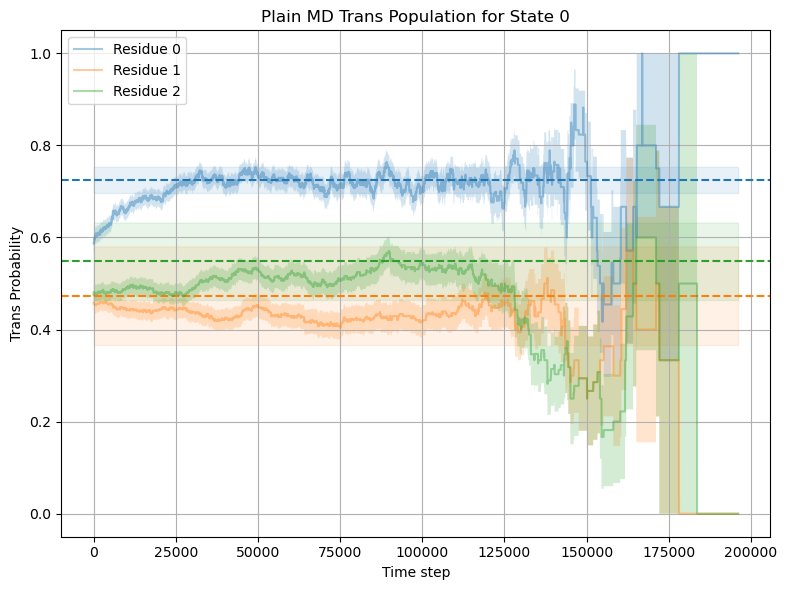

In [26]:
state_num = 1

for state_index in range(state_num): 
    plt.figure(figsize=(8, 6))
    
    for residue_index in range(3):  # Loop over 3 residues
        y = p_trans[:, residue_index]
        yerr = p_trans_std[:, residue_index]
        x = np.arange(len(y))  # or use actual time values

        # Time-dependent population
        plt.plot(x, y, label=f'Residue {residue_index}', alpha=0.4)
        plt.fill_between(x, y - yerr, y + yerr, alpha=0.2)

        # Reference horizontal line
        ref_y = trans_refer_array[state_index, residue_index]
        ref_yerr = trans_refer_err_array[state_index, residue_index]

        plt.axhline(y=ref_y, linestyle='--', color=f'C{residue_index}', alpha=1)
        plt.fill_between(x, ref_y - ref_yerr, ref_y + ref_yerr, color=f'C{residue_index}', alpha=0.1)

    plt.title(f'Plain MD Trans Population for State {state_index}')
    plt.xlabel('Time step')
    plt.ylabel('Trans Probability')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


## Plot the error from MSM

In [19]:
errors_all = []
errors_err_all = []


for res in range(3):
    # Broadcast reference to (6, 600030)
    reference = trans_refer_array[:, res][:, np.newaxis]
    reference_err = trans_refer_err_array[:, res][:, np.newaxis]

    # Compute differences and propagated error
    errors = p_trans[:, res] - reference
    errors_err = np.sqrt(
        p_trans_std[:, res]**2 + reference_err**2
    )

    errors_all.append(errors)
    errors_err_all.append(errors_err)

    #plt.plot(errors)
    #plt.show()

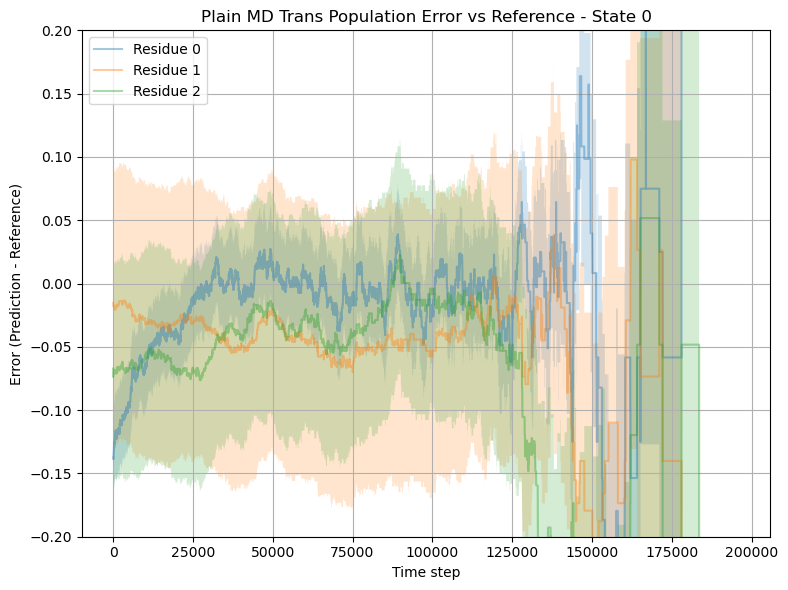

In [25]:
state_num = 1

plt.figure(figsize=(8, 6))

x = np.arange(p_trans.shape[0])  # Time axis, e.g., 600030

for residue_index in range(3):  # Loop over 3 residues
    error = p_trans[:, residue_index] - trans_refer_array[0 , residue_index]
    
    error_err = np.sqrt(
        p_trans_std[:, residue_index] ** 2 +
        trans_refer_err_array[0, residue_index] ** 2  # ✅ square this too
    )

    plt.plot(x, error, label=f'Residue {residue_index}', alpha=0.4)
    plt.fill_between(x, error - error_err, error + error_err, alpha=0.2)

plt.title(f'Plain MD Trans Population Error vs Reference - State {state_index}')
plt.xlabel('Time step')
plt.ylabel('Error (Prediction - Reference)')
plt.grid(True)
plt.legend()
plt.ylim(-0.2, 0.2)
plt.tight_layout()
plt.show()


### Plot Trans population for individual state 

In [11]:
print(f"shape of traj : {traj.shape}")

first_frame = traj[:, 0] # Extract the first column, where we get the (742, 3) data
print(first_frame.shape)
unique_rows, indices = np.unique(first_frame, axis=0, return_inverse=True)
print(unique_rows)

# Assignment the frame index into subgroup according to unique first row
subgroups = {i: [] for i in range(len(unique_rows))}

# Append the traj to each subgroup 
for traj_idx, group_idx in enumerate(indices):
    subgroups[group_idx].append(traj[traj_idx])
    #print(f"Group {group_idx}: shape = {np.shape(subgroups[group_idx])}")


shape of traj : (742, 196095, 3)
(742, 3)
[[0. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 1.]
 [1. 0. 0.]
 [1. 0. 1.]
 [1. 1. 0.]
 [1. 1. 1.]]


Processing Group 0
Group 0 Shape: (80, 196095, 3)


/var/folders/2g/yfyfpy7d3n3fwl_23ytkftvm0000gn/T/ipykernel_29950/1329450173.py:13: RuntimeWarning: Mean of empty slice
  p_trans = np.nanmean(traj, axis=0)
/var/folders/2g/yfyfpy7d3n3fwl_23ytkftvm0000gn/T/ipykernel_29950/1329450173.py:14: RuntimeWarning: Degrees of freedom <= 0 for slice.
  p_trans_std = ((np.nanvar(traj, axis=0)) / (n_included-1))**0.5
/var/folders/2g/yfyfpy7d3n3fwl_23ytkftvm0000gn/T/ipykernel_29950/1329450173.py:14: RuntimeWarning: invalid value encountered in divide
  p_trans_std = ((np.nanvar(traj, axis=0)) / (n_included-1))**0.5


p_trans shape (196095, 3)
p_trans_std shape (196095, 3)
Processing Group 1
Group 1 Shape: (77, 196095, 3)


/var/folders/2g/yfyfpy7d3n3fwl_23ytkftvm0000gn/T/ipykernel_29950/1329450173.py:13: RuntimeWarning: Mean of empty slice
  p_trans = np.nanmean(traj, axis=0)
/var/folders/2g/yfyfpy7d3n3fwl_23ytkftvm0000gn/T/ipykernel_29950/1329450173.py:14: RuntimeWarning: Degrees of freedom <= 0 for slice.
  p_trans_std = ((np.nanvar(traj, axis=0)) / (n_included-1))**0.5
/var/folders/2g/yfyfpy7d3n3fwl_23ytkftvm0000gn/T/ipykernel_29950/1329450173.py:14: RuntimeWarning: invalid value encountered in divide
  p_trans_std = ((np.nanvar(traj, axis=0)) / (n_included-1))**0.5


p_trans shape (196095, 3)
p_trans_std shape (196095, 3)
Processing Group 2
Group 2 Shape: (78, 196095, 3)


/var/folders/2g/yfyfpy7d3n3fwl_23ytkftvm0000gn/T/ipykernel_29950/1329450173.py:13: RuntimeWarning: Mean of empty slice
  p_trans = np.nanmean(traj, axis=0)
/var/folders/2g/yfyfpy7d3n3fwl_23ytkftvm0000gn/T/ipykernel_29950/1329450173.py:14: RuntimeWarning: Degrees of freedom <= 0 for slice.
  p_trans_std = ((np.nanvar(traj, axis=0)) / (n_included-1))**0.5
/var/folders/2g/yfyfpy7d3n3fwl_23ytkftvm0000gn/T/ipykernel_29950/1329450173.py:14: RuntimeWarning: invalid value encountered in divide
  p_trans_std = ((np.nanvar(traj, axis=0)) / (n_included-1))**0.5


p_trans shape (196095, 3)
p_trans_std shape (196095, 3)
Processing Group 3
Group 3 Shape: (71, 196095, 3)


/var/folders/2g/yfyfpy7d3n3fwl_23ytkftvm0000gn/T/ipykernel_29950/1329450173.py:13: RuntimeWarning: Mean of empty slice
  p_trans = np.nanmean(traj, axis=0)
/var/folders/2g/yfyfpy7d3n3fwl_23ytkftvm0000gn/T/ipykernel_29950/1329450173.py:14: RuntimeWarning: Degrees of freedom <= 0 for slice.
  p_trans_std = ((np.nanvar(traj, axis=0)) / (n_included-1))**0.5
/var/folders/2g/yfyfpy7d3n3fwl_23ytkftvm0000gn/T/ipykernel_29950/1329450173.py:14: RuntimeWarning: invalid value encountered in divide
  p_trans_std = ((np.nanvar(traj, axis=0)) / (n_included-1))**0.5


p_trans shape (196095, 3)
p_trans_std shape (196095, 3)
Processing Group 4
Group 4 Shape: (114, 196095, 3)


/var/folders/2g/yfyfpy7d3n3fwl_23ytkftvm0000gn/T/ipykernel_29950/1329450173.py:14: RuntimeWarning: invalid value encountered in divide
  p_trans_std = ((np.nanvar(traj, axis=0)) / (n_included-1))**0.5


p_trans shape (196095, 3)
p_trans_std shape (196095, 3)
Processing Group 5
Group 5 Shape: (131, 196095, 3)


/var/folders/2g/yfyfpy7d3n3fwl_23ytkftvm0000gn/T/ipykernel_29950/1329450173.py:13: RuntimeWarning: Mean of empty slice
  p_trans = np.nanmean(traj, axis=0)
/var/folders/2g/yfyfpy7d3n3fwl_23ytkftvm0000gn/T/ipykernel_29950/1329450173.py:14: RuntimeWarning: Degrees of freedom <= 0 for slice.
  p_trans_std = ((np.nanvar(traj, axis=0)) / (n_included-1))**0.5
/var/folders/2g/yfyfpy7d3n3fwl_23ytkftvm0000gn/T/ipykernel_29950/1329450173.py:14: RuntimeWarning: invalid value encountered in divide
  p_trans_std = ((np.nanvar(traj, axis=0)) / (n_included-1))**0.5


p_trans shape (196095, 3)
p_trans_std shape (196095, 3)
Processing Group 6
Group 6 Shape: (113, 196095, 3)


/var/folders/2g/yfyfpy7d3n3fwl_23ytkftvm0000gn/T/ipykernel_29950/1329450173.py:13: RuntimeWarning: Mean of empty slice
  p_trans = np.nanmean(traj, axis=0)
/var/folders/2g/yfyfpy7d3n3fwl_23ytkftvm0000gn/T/ipykernel_29950/1329450173.py:14: RuntimeWarning: Degrees of freedom <= 0 for slice.
  p_trans_std = ((np.nanvar(traj, axis=0)) / (n_included-1))**0.5
/var/folders/2g/yfyfpy7d3n3fwl_23ytkftvm0000gn/T/ipykernel_29950/1329450173.py:14: RuntimeWarning: invalid value encountered in divide
  p_trans_std = ((np.nanvar(traj, axis=0)) / (n_included-1))**0.5


p_trans shape (196095, 3)
p_trans_std shape (196095, 3)
Processing Group 7
Group 7 Shape: (78, 196095, 3)


/var/folders/2g/yfyfpy7d3n3fwl_23ytkftvm0000gn/T/ipykernel_29950/1329450173.py:13: RuntimeWarning: Mean of empty slice
  p_trans = np.nanmean(traj, axis=0)
/var/folders/2g/yfyfpy7d3n3fwl_23ytkftvm0000gn/T/ipykernel_29950/1329450173.py:14: RuntimeWarning: Degrees of freedom <= 0 for slice.
  p_trans_std = ((np.nanvar(traj, axis=0)) / (n_included-1))**0.5
/var/folders/2g/yfyfpy7d3n3fwl_23ytkftvm0000gn/T/ipykernel_29950/1329450173.py:14: RuntimeWarning: invalid value encountered in divide
  p_trans_std = ((np.nanvar(traj, axis=0)) / (n_included-1))**0.5


p_trans shape (196095, 3)
p_trans_std shape (196095, 3)


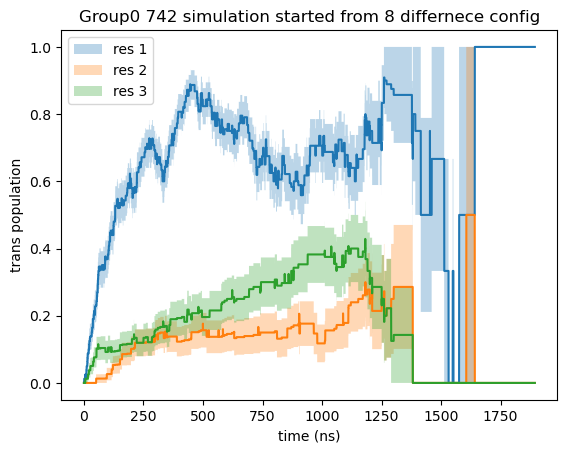

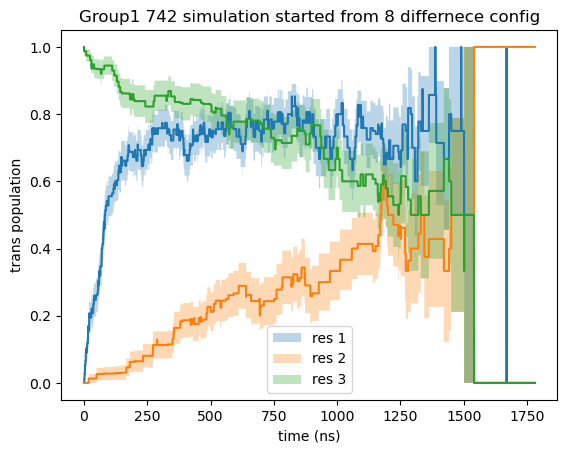

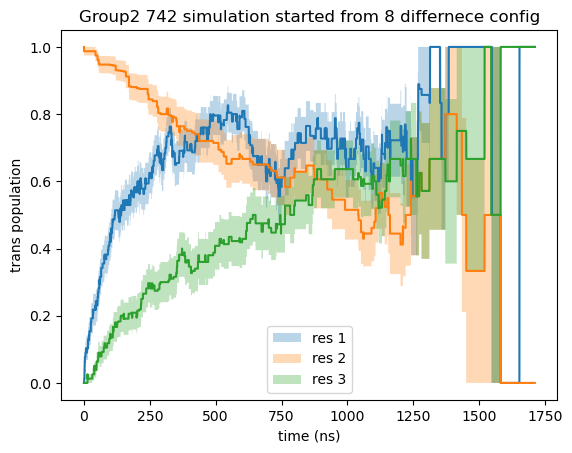

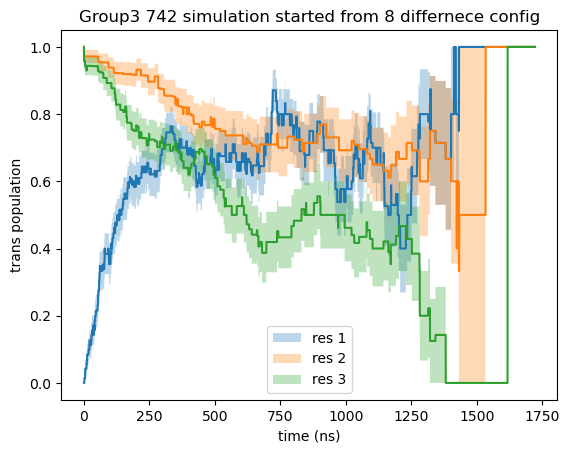

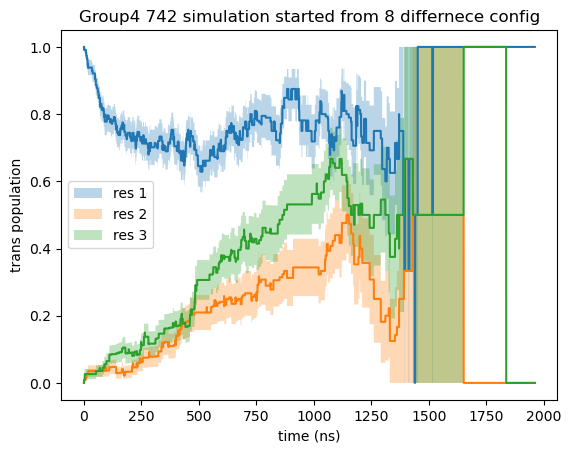

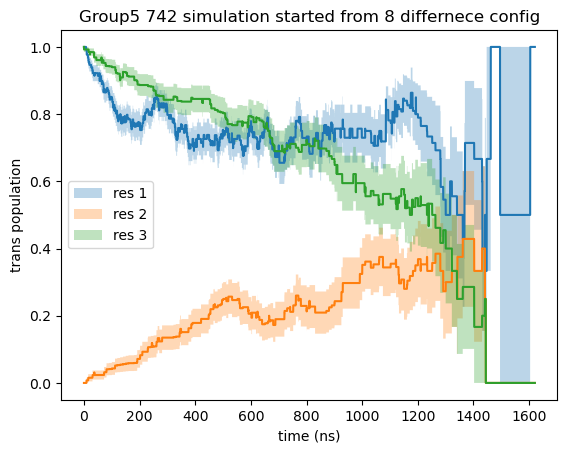

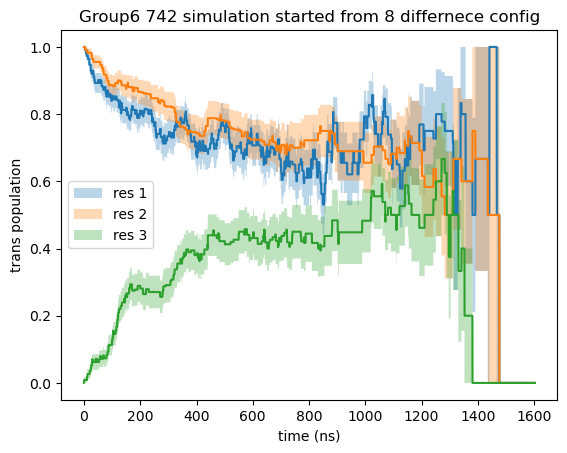

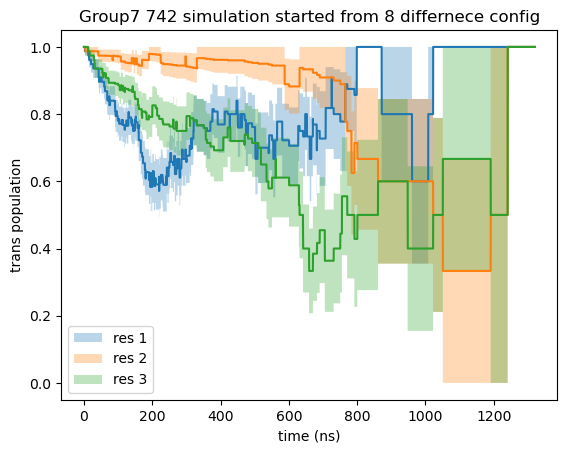

In [12]:
# Ensure subgroups are converted to NumPy arrays
for group_idx in subgroups:
    subgroups[group_idx] = np.array(subgroups[group_idx])

for group_idx, traj in subgroups.items():
    print(f"Processing Group {group_idx}")
    print(f"Group {group_idx} Shape: {np.shape(traj)}")


    n_included = np.sum(np.where(np.isnan(traj[:,:,:]), 0, 1), axis=0)
    #print('n_included', n_included, 'n_included.shape', n_included.shape)

    p_trans = np.nanmean(traj, axis=0)
    p_trans_std = ((np.nanvar(traj, axis=0)) / (n_included-1))**0.5

    print('p_trans shape', np.shape(p_trans) )
    print('p_trans_std shape', np.shape(p_trans_std))

    ### Plotting the figure 
    plt.figure()

    ns_per_step = 0.01
    time_in_ns = np.arange(maxlength)*ns_per_step

    plt.plot(time_in_ns, p_trans) # all three residues
    plt.fill_between(time_in_ns, (p_trans+p_trans_std)[:,0], (p_trans-p_trans_std)[:,0], alpha=0.3, lw=1, label='res 1') # all three residues
    plt.fill_between(time_in_ns, (p_trans+p_trans_std)[:,1], (p_trans-p_trans_std)[:,1], alpha=0.3, lw=1, label='res 2') # all three residues
    plt.fill_between(time_in_ns, (p_trans+p_trans_std)[:,2], (p_trans-p_trans_std)[:,2], alpha=0.3, lw=1, label='res 3') # all three residues
    plt.xlabel('time (ns)')
    plt.ylabel('trans population')
    plt.title(f"Group{group_idx} 742 simulation started from 8 differnece config")

    plt.legend(loc='best')



In [13]:
unique_rows

array([[0., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 1.],
       [1., 0., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 1.]])

In [14]:

# Ensure subgroups are converted to NumPy arrays
for group_idx in subgroups:
    subgroups[group_idx] = np.array(subgroups[group_idx])

# Create a figure with a 2x4 grid of subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 6))  # Adjust figsize for better spacing
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

for idx, (group_idx, traj) in enumerate(subgroups.items()):
    print(f"Processing Group {group_idx}")
    print(f"Group {group_idx} Shape: {np.shape(traj)}")

    n_included = np.sum(np.where(np.isnan(traj[:,:,:]), 0, 1), axis=0)

    p_trans = np.nanmean(traj, axis=0)
    p_trans_std = ((np.nanvar(traj, axis=0)) / (n_included-1))**0.5

    print('p_trans shape', np.shape(p_trans))
    print('p_trans_std shape', np.shape(p_trans_std))

    ### Plotting on the appropriate subplot
    ax = axes[idx]
    ns_per_step = 0.01
    time_in_ns = np.arange(maxlength) * ns_per_step

    ax.plot(time_in_ns, p_trans, label='Mean')  # Plot the mean
    ax.fill_between(time_in_ns, (p_trans+p_trans_std)[:,0], (p_trans-p_trans_std)[:,0], alpha=0.3, lw=1, label='res 1')
    ax.fill_between(time_in_ns, (p_trans+p_trans_std)[:,1], (p_trans-p_trans_std)[:,1], alpha=0.3, lw=1, label='res 2')
    ax.fill_between(time_in_ns, (p_trans+p_trans_std)[:,2], (p_trans-p_trans_std)[:,2], alpha=0.3, lw=1, label='res 3')

    ax.set_xlabel('time (ns)')
    ax.set_ylabel('trans population')
    ax.set_title(f"Group {unique_rows[group_idx]}")
    ax.legend(loc='best')

# Hide unused subplots if there are fewer groups than 8
for i in range(len(subgroups), 8):
    fig.delaxes(axes[i])

# Adjust spacing between subplots
plt.tight_layout()

# Save the figure or show it
plt.savefig("Individual_starting_config_trans_populaiton_convergence_plot.png", dpi=300)  # Save to a file if needed
plt.show()


KeyboardInterrupt: 

### starting from each residule 

In [ ]:
def plot_trans_p(traj1, traj2, title):
    
    """
    Plot the mean and standard deviation of trans populations over time.

    Parameters:
    traj : ndarray
        A 3D numpy array of shape (num_trajectories, timesteps, num_residues),
        where the data contains trans/cis information for multiple trajectories.

    Output:
    A plot showing the trans population mean and standard deviation for all residues over time.
    """


    n_included_1 = np.sum(np.where(np.isnan(traj1[:,:,:]), 0, 1), axis=0)
    p_trans_1 = np.nanmean(traj, axis=0)
    p_trans_std_1 = ((np.nanvar(traj, axis=0)) / (n_included_1-1))**0.5


    plt.figure()

    maxlength = traj.shape[1]
    ns_per_step = 0.01
    time_in_ns = np.arange(maxlength)*ns_per_step

    plt.plot(time_in_ns, p_trans) # all three residues
    plt.fill_between(time_in_ns, (p_trans+p_trans_std)[:,0], (p_trans-p_trans_std)[:,0], alpha=0.3, lw=1, label='res 1') # all three residues
    plt.fill_between(time_in_ns, (p_trans+p_trans_std)[:,1], (p_trans-p_trans_std)[:,1], alpha=0.3, lw=1, label='res 2') # all three residues
    plt.fill_between(time_in_ns, (p_trans+p_trans_std)[:,2], (p_trans-p_trans_std)[:,2], alpha=0.3, lw=1, label='res 3') # all three residues
    plt.xlabel('time (ns)')
    plt.ylabel('trans population')
    plt.title(f"{title}")

    plt.legend(loc='best')
    plt.show()

#### res 1

In [ ]:
unique_rows

trans_idx = [4, 5, 6, 7]
cis_idx = [0, 1, 2, 3]
trans = []
cis = []

# Initialize lists for trans and cis groups
trans = [subgroups[i] for i in trans_idx]
cis = [subgroups[i] for i in cis_idx]

trans_stacked = np.vstack(trans)
cis_stacked = np.vstack(cis)

print('Shape of trans', np.shape(trans_stacked))


Shape of trans (436, 196095, 3)


/var/folders/2g/yfyfpy7d3n3fwl_23ytkftvm0000gn/T/ipykernel_29740/2084307243.py:6: RuntimeWarning: invalid value encountered in divide
  p_trans_std_1 = ((np.nanvar(traj1[:,:,0], axis=0)) / (n_included_1-1))**0.5
/var/folders/2g/yfyfpy7d3n3fwl_23ytkftvm0000gn/T/ipykernel_29740/2084307243.py:9: RuntimeWarning: Mean of empty slice
  p_trans_2 = np.nanmean(traj2[:,:,0], axis=0)
/var/folders/2g/yfyfpy7d3n3fwl_23ytkftvm0000gn/T/ipykernel_29740/2084307243.py:10: RuntimeWarning: Degrees of freedom <= 0 for slice.
  p_trans_std_2 = ((np.nanvar(traj2[:,:,0], axis=0)) / (n_included_2-1))**0.5
/var/folders/2g/yfyfpy7d3n3fwl_23ytkftvm0000gn/T/ipykernel_29740/2084307243.py:10: RuntimeWarning: invalid value encountered in divide
  p_trans_std_2 = ((np.nanvar(traj2[:,:,0], axis=0)) / (n_included_2-1))**0.5


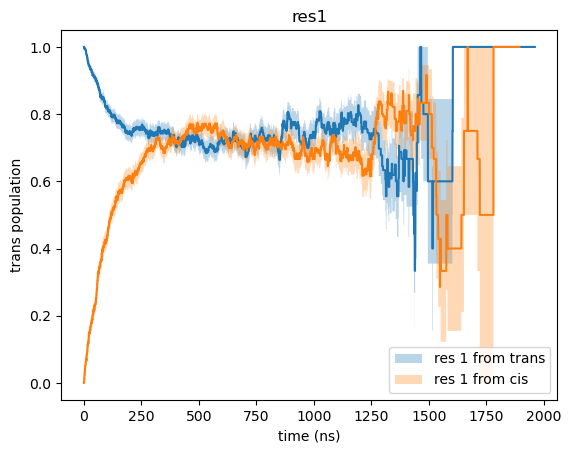

In [ ]:
traj1 = trans_stacked
traj2 = cis_stacked

n_included_1 = np.sum(np.where(np.isnan(traj1[:,:,0]), 0, 1), axis=0) # Frist Residue
p_trans_1 = np.nanmean(traj1[:,:,0], axis=0)
p_trans_std_1 = ((np.nanvar(traj1[:,:,0], axis=0)) / (n_included_1-1))**0.5

n_included_2 = np.sum(np.where(np.isnan(traj2[:,:,0]), 0, 1), axis=0) # Frist Residue
p_trans_2 = np.nanmean(traj2[:,:,0], axis=0)
p_trans_std_2 = ((np.nanvar(traj2[:,:,0], axis=0)) / (n_included_2-1))**0.5

plt.figure()

maxlength = traj1.shape[1]
ns_per_step = 0.01
time_in_ns = np.arange(maxlength)*ns_per_step

plt.plot(time_in_ns[:], p_trans_1) # first residue from trans
plt.plot(time_in_ns[:], p_trans_2) # first residue from cis 

plt.fill_between(time_in_ns, (p_trans_1+p_trans_std_1), (p_trans_1-p_trans_std_1), alpha=0.3, lw=1, label='res 1 from trans')
plt.fill_between(time_in_ns, (p_trans_2+p_trans_std_2), (p_trans_2-p_trans_std_2), alpha=0.3, lw=1, label='res 1 from cis') 
plt.xlabel('time (ns)')
plt.ylabel('trans population')
plt.title(f"{'res1'}")

plt.legend(loc='best')
plt.show()

#### res 2

In [ ]:
unique_rows

trans_idx = [2, 3, 6, 7]
cis_idx = [0, 1, 4, 5]
trans = []
cis = []

# Initialize lists for trans and cis groups
trans = [subgroups[i] for i in trans_idx]
cis = [subgroups[i] for i in cis_idx]

trans_stacked = np.vstack(trans)
cis_stacked = np.vstack(cis)

print('Shape of trans', np.shape(trans_stacked))

Shape of trans (340, 196095, 3)


/var/folders/2g/yfyfpy7d3n3fwl_23ytkftvm0000gn/T/ipykernel_29740/3445177343.py:5: RuntimeWarning: Mean of empty slice
  p_trans_1 = np.nanmean(traj1[:,:,1], axis=0)
/var/folders/2g/yfyfpy7d3n3fwl_23ytkftvm0000gn/T/ipykernel_29740/3445177343.py:6: RuntimeWarning: Degrees of freedom <= 0 for slice.
  p_trans_std_1 = ((np.nanvar(traj1[:,:,1], axis=0)) / (n_included_1-1))**0.5
/var/folders/2g/yfyfpy7d3n3fwl_23ytkftvm0000gn/T/ipykernel_29740/3445177343.py:6: RuntimeWarning: invalid value encountered in divide
  p_trans_std_1 = ((np.nanvar(traj1[:,:,1], axis=0)) / (n_included_1-1))**0.5
/var/folders/2g/yfyfpy7d3n3fwl_23ytkftvm0000gn/T/ipykernel_29740/3445177343.py:10: RuntimeWarning: invalid value encountered in divide
  p_trans_std_2 = ((np.nanvar(traj2[:,:,1], axis=0)) / (n_included_2-1))**0.5


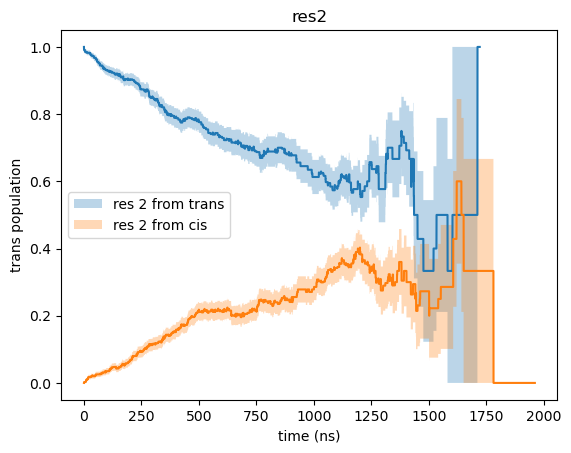

In [ ]:
traj1 = trans_stacked
traj2 = cis_stacked

n_included_1 = np.sum(np.where(np.isnan(traj1[:,:,1]), 0, 1), axis=0) # Second Residue
p_trans_1 = np.nanmean(traj1[:,:,1], axis=0)
p_trans_std_1 = ((np.nanvar(traj1[:,:,1], axis=0)) / (n_included_1-1))**0.5

n_included_2 = np.sum(np.where(np.isnan(traj2[:,:,1]), 0, 1), axis=0) # Second Residue
p_trans_2 = np.nanmean(traj2[:,:,1], axis=0)
p_trans_std_2 = ((np.nanvar(traj2[:,:,1], axis=0)) / (n_included_2-1))**0.5

plt.figure()

maxlength = traj1.shape[1]
ns_per_step = 0.01
time_in_ns = np.arange(maxlength)*ns_per_step

plt.plot(time_in_ns[:], p_trans_1) # first residue from trans
plt.plot(time_in_ns[:], p_trans_2) # first residue from cis 

plt.fill_between(time_in_ns, (p_trans_1+p_trans_std_1), (p_trans_1-p_trans_std_1), alpha=0.3, lw=1, label='res 2 from trans')
plt.fill_between(time_in_ns, (p_trans_2+p_trans_std_2), (p_trans_2-p_trans_std_2), alpha=0.3, lw=1, label='res 2 from cis') 
plt.xlabel('time (ns)')
plt.ylabel('trans population')
plt.title(f"{'res2'}")

plt.legend(loc='best')
plt.show()

#### res 3

In [ ]:
unique_rows

trans_idx = [1, 3, 5, 7]
cis_idx = [0, 2, 4, 6]
trans = []
cis = []

# Initialize lists for trans and cis groups
trans = [subgroups[i] for i in trans_idx]
cis = [subgroups[i] for i in cis_idx]

trans_stacked = np.vstack(trans)
cis_stacked = np.vstack(cis)

print('Shape of trans', np.shape(trans_stacked))


Shape of trans (357, 196095, 3)


/var/folders/2g/yfyfpy7d3n3fwl_23ytkftvm0000gn/T/ipykernel_29740/1471064919.py:5: RuntimeWarning: Mean of empty slice
  p_trans_1 = np.nanmean(traj1[:,:,2], axis=0)
/var/folders/2g/yfyfpy7d3n3fwl_23ytkftvm0000gn/T/ipykernel_29740/1471064919.py:6: RuntimeWarning: Degrees of freedom <= 0 for slice.
  p_trans_std_1 = ((np.nanvar(traj1[:,:,2], axis=0)) / (n_included_1-1))**0.5
/var/folders/2g/yfyfpy7d3n3fwl_23ytkftvm0000gn/T/ipykernel_29740/1471064919.py:6: RuntimeWarning: invalid value encountered in divide
  p_trans_std_1 = ((np.nanvar(traj1[:,:,2], axis=0)) / (n_included_1-1))**0.5
/var/folders/2g/yfyfpy7d3n3fwl_23ytkftvm0000gn/T/ipykernel_29740/1471064919.py:10: RuntimeWarning: invalid value encountered in divide
  p_trans_std_2 = ((np.nanvar(traj2[:,:,2], axis=0)) / (n_included_2-1))**0.5


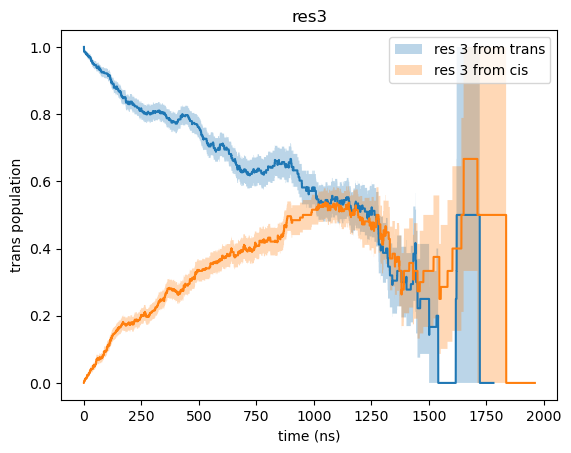

In [ ]:
traj1 = trans_stacked
traj2 = cis_stacked

n_included_1 = np.sum(np.where(np.isnan(traj1[:,:,2]), 0, 1), axis=0) # Third Residue
p_trans_1 = np.nanmean(traj1[:,:,2], axis=0)
p_trans_std_1 = ((np.nanvar(traj1[:,:,2], axis=0)) / (n_included_1-1))**0.5

n_included_2 = np.sum(np.where(np.isnan(traj2[:,:,2]), 0, 1), axis=0) # Third Residue
p_trans_2 = np.nanmean(traj2[:,:,2], axis=0)
p_trans_std_2 = ((np.nanvar(traj2[:,:,2], axis=0)) / (n_included_2-1))**0.5

plt.figure()

maxlength = traj1.shape[1]
ns_per_step = 0.01
time_in_ns = np.arange(maxlength)*ns_per_step

plt.plot(time_in_ns[:], p_trans_1) # first residue from trans
plt.plot(time_in_ns[:], p_trans_2) # first residue from cis 

plt.fill_between(time_in_ns, (p_trans_1+p_trans_std_1), (p_trans_1-p_trans_std_1), alpha=0.3, lw=1, label='res 3 from trans')
plt.fill_between(time_in_ns, (p_trans_2+p_trans_std_2), (p_trans_2-p_trans_std_2), alpha=0.3, lw=1, label='res 3 from cis') 
plt.xlabel('time (ns)')
plt.ylabel('trans population')
plt.title(f"{'res3'}")

plt.legend(loc='best')
plt.show()

### Analysis the distribution of All Omegas 

742


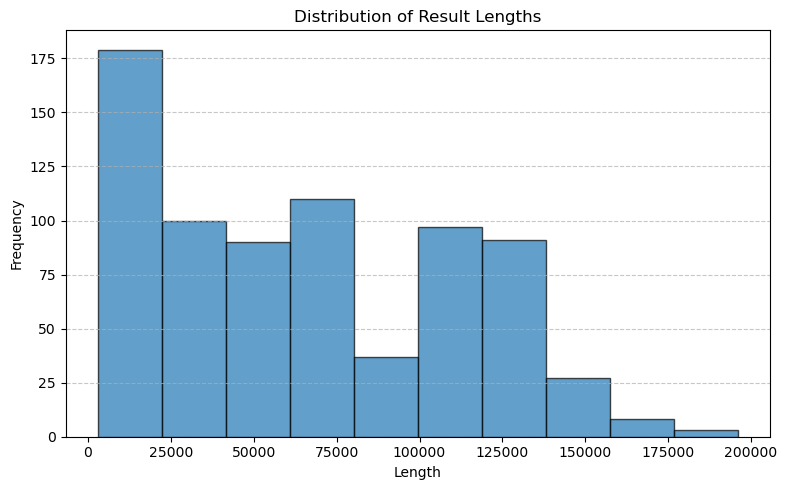

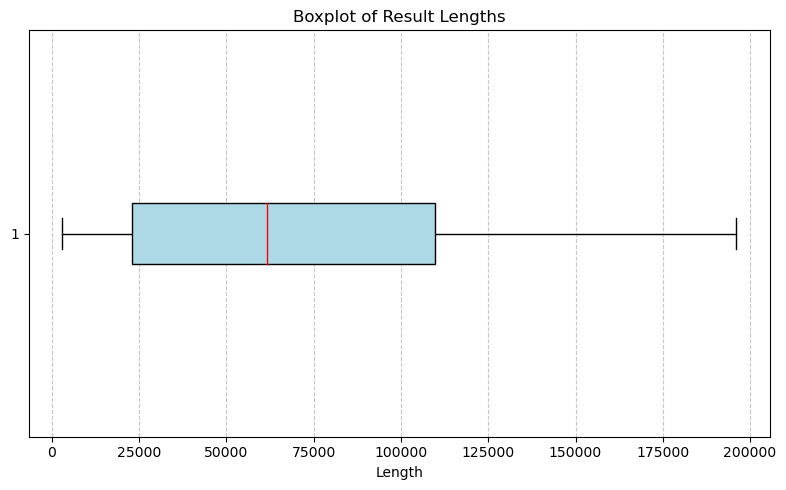

In [ ]:
print(len(all_omega))  # Print the total number of results in all_omega
result_lengths = []  # Initialize an empty list to store lengths

# Iterate through all results and compute their lengths
for i in range(len(all_omega)):
    result_lengths.append(len(all_omega[i]))

# Plot the histogram of `result_lengths`
plt.figure(figsize=(8, 5))
plt.hist(result_lengths, bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribution of Result Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plotting a boxplot for `result_lengths`
plt.figure(figsize=(8, 5))
plt.boxplot(result_lengths, vert=False, patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            medianprops=dict(color='red'))

plt.title('Boxplot of Result Lengths')
plt.xlabel('Length')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()